# Exploratory Data Analysis ~ London Bike Sharing

## Latar Belakang
London Bike Sharing merupakan skema penyewaan sepeda umum di London yang mulai beroperasi pada tahun 2010. Skema penyewaan ini  mendorong warga untuk mulai bersepeda di London. Biaya penyewaan sepeda sejumlah £2 untuk tiap 30 menit, dengan batas maksimal penyewaan selama 24 jam. Sistem penyewaan dapat melalui aplikasi maupun layar interaktif di setiap docking station.

Referensi: https://www.visitlondon.com/traveller-information/getting-around-london/london-cycle-hire-scheme

## Business Problem
Pandemi yang diakibatkan oleh Coronavirus telah mengubah perilaku warga London dalam berpergian menggunakan transportasi. Ketakutan tertular virus Corona di transportasi umum telah memicu peningkatan 200% dalam penggunaan sepeda sebagai alat transportasi. Perubahan perilaku ini dapat menjadi kesempatan untuk London Bike Sharing untuk meningkatkan pendapatan jika ditanggapi dengan rencana bisnis yang tepat. Salah satunya yaitu dengan cara memahami faktor-faktor yang mempengaruhi penyewaan sepeda di London.

Referensi: https://www.bbc.com/news/business-52564351

## Goals
Mengetahui variabel apa yang berpengaruh dalam permintaan penyewaan sepeda dan seberapa besar pengaruh variabel tersebut berdasarkan data yang tersedia. Identifikasi varibel-variabel tersebut diharapkan dapat mengantisipasi kebutuhan sewa yang tinggi maupun meningkatkan pada kondisi yang masih rendah.

Sumber Dataset: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [258]:
df = pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Analisa Deskriptif

Definisi kolom data:
- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

Definisi kategori "weather_code":
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

In [5]:
# Mengetahui jumlah keseluruhan data (10 kolom dan 17414 baris data)
df.shape

(17414, 10)

In [259]:
# Mengubah tipe data menjadi datetime agar dapat diekstrak menjadi komponen hari, bulan, waktu untuk dianalisa lebih lanjut
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [312]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
year,17414.0,2015.507810,0.508157,2015.0,2015.0,2016.0,2016.00,2017.0


In [28]:
# Mendeskripsi tiap kolom, mengidentifikasi fitur-fitur untuk analisa data dan tipe datanya
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,timestamp,datetime64[ns],0,0.0,17414,"[2015-08-13T14:00:00.000000000, 2015-10-16T15:..."
1,cnt,int64,0,0.0,3781,"[828, 173]"
2,t1,float64,0,0.0,73,"[4.5, 24.5]"
3,t2,float64,0,0.0,82,"[16.5, -2.0]"
4,hum,float64,0,0.0,143,"[35.5, 88.5]"
5,wind_speed,float64,0,0.0,103,"[42.0, 5.5]"
6,weather_code,float64,0,0.0,7,"[3.0, 2.0]"
7,is_holiday,float64,0,0.0,2,"[1.0, 0.0]"
8,is_weekend,float64,0,0.0,2,"[0.0, 1.0]"
9,season,float64,0,0.0,4,"[1.0, 0.0]"


- Kolom 'timestamp' sebagai feature yang dapat diekstrak untuk analisa lebih mendalam dari faktor waktu, hari dan bulan
- Kolom 'cnt' sebagai kolom target yang menunjukkan jumlah penyewaan sepeda
- Kolom 't1', 't2', 'hum', 'wind_speed' sebagai feature numerik dengan variasi data puluhan hingga ratusan
- Kolom 'weather_code', 'is_holiday', 'is_weekend', 'season' sebagai feature kategorikal

## Missing Value dan Outliers

In [7]:
# Mengidentifikasi missing value dalam dataset (Tidak terdapat missing value)
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [122]:
# Deskripsi kolom 'cnt'
df.describe()['cnt']

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

In [138]:
# Mengidentifikasi outliers dalam kolom 'cnt'
Q1 = df.describe()['cnt']['25%']
Q3 = df.describe()['cnt']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
df[(df['cnt'] < Lower_Fence) | (df['cnt'] > Upper_Fence)].head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,time
223,2015-01-13 08:00:00,3960,9.0,6.5,71.0,16.0,Few Clouds,No,No,Winter,2015,January,Tuesday,08:00
247,2015-01-14 08:00:00,3904,4.0,-1.0,70.0,26.0,Few Clouds,No,No,Winter,2015,January,Wednesday,08:00
439,2015-01-22 08:00:00,3828,2.0,1.0,81.0,5.0,Broken Clouds,No,No,Winter,2015,January,Thursday,08:00
559,2015-01-27 08:00:00,3835,5.5,2.5,78.5,15.0,Clear,No,No,Winter,2015,January,Tuesday,08:00
1230,2015-02-24 08:00:00,3841,6.0,2.0,76.0,20.0,Clear,No,No,Winter,2015,February,Tuesday,08:00


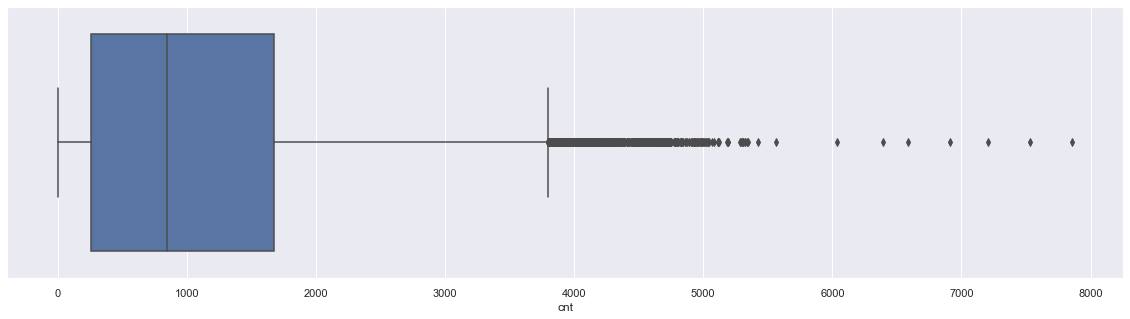

In [134]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = 'cnt', data = df)

- Median di data jumlah sewa di angka 844
- Upper Fence jumlah sewa adalah 3793
- Outliers data jumlah sewa yang berada diatas Upper Fence sebanyak 675 (3,88% dari 17414 data), dengan nilai maksimum 7860

## Analisis dan Visualisasi Data

### Ekstraksi Kolom 'timestamp'

In [260]:
timestamp_dt = df['timestamp'].dt

In [261]:
# Penambahan kolom tahun
df['year'] = timestamp_dt.year

In [262]:
# Penambahan kolom nama bulan
df['month'] = timestamp_dt.month

In [264]:
# Penambahan kolom nama hari
df['day'] = timestamp_dt.day_name()

In [265]:
# Penambahan kolom waktu
df['time'] = timestamp_dt.strftime('%H:%M')

In [266]:
# Menampilkan hasil setelah ekstraksi dan penambahan kolom
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,time
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,Sunday,00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,Sunday,01:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,Sunday,02:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,Sunday,03:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,Sunday,04:00


### Korelasi antar Variabel

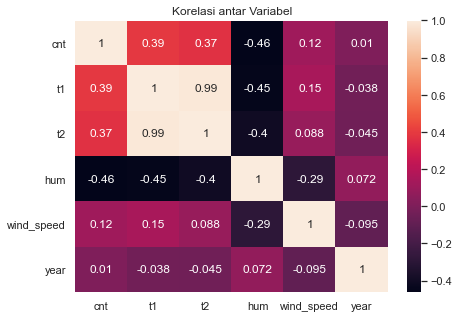

In [155]:
# Menampilkan derajat korelasi antar variabel numerik untuk perbandingan analisa
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)
plt.title("Korelasi antar Variabel")
plt.show()

- Dari heatmap diatas, dapat dilihat bahwa untuk varibel-variabel numerik ada korelasi dengan jumlah sewa, namun tidak terlihat variable dengan tingkat korelasi yang tinggi
- Korelasi 0.39 dengan temperatur dan korelasi negatif (-0.46) dengan kelembapan


In [267]:
# Mengubah deskripsi data pada kolom kategorikal untuk mempermudah penamaan dan urutan dalam analisis dan visualisasi

# Mengubah deskripsi data kolom 'weather_code'
df['weather_code'] = df['weather_code'].map({1: 'A_Clear', 2: 'B_Few Clouds', 3: 'C_Broken Clouds', 4: 'D_Cloudy',
                                             7: 'E_Light Rain', 10: 'F_Thunderstorm', 26: 'G_Snowfall', 49: 'G_Freezing Fog'})
# Mengubah deskripsi data kolom 'is_holiday'
df['is_holiday'] = df['is_holiday'].map({0: 'No', 1: 'Holiday'})
# Mengubah deskripsi data kolom 'is_weekend'
df['is_weekend'] = df['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
# Mengubah deskripsi data kolom 'season'
df['season'] = df['season'].map({0: 'A_Spring', 1: 'B_Summer', 2: 'C_Fall', 3: 'D_Winter'})
# Mengubah deskripsi data pada kolom 'month'
df['month'] = df['month'].map({1: '01_Jan', 2: '02_Feb', 3: '03_Mar', 4: '04_Apr',  5: '05_May', 6: '06_June',
                               7: '07_July', 8: '08_Aug', 9: '09_Sep', 10: '10_Oct', 11: '11_Nov', 12: '12_Dec'})
# Mengubah deskripsi data pada kolom 'day'
df['day'] = df['day'].map({'Monday': '1_Mon', 'Tuesday': '2_Tue', 'Wednesday': '3_Wed', 'Thursday': '4_Thu',
                           'Friday': '5_Fri', 'Saturday': '6_Sat', 'Sunday': '7_Sun'})

### Perbandingan Rata-Rata Jumlah Sewa berdasarkan Temperature dan Humidity:

Text(0, 0.5, 'Rata-Rata Jumlah Sewa')

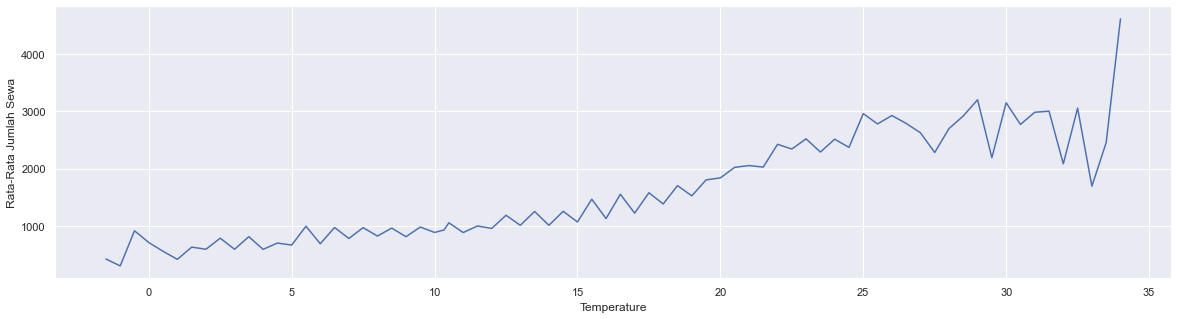

In [324]:
# Rata-rata jumlah sewa di group by 't1'
mean_t1 = df.groupby('t1').mean()['cnt'].round()
# Memvisualisasikan dengan line plot agar dapat dibandingkan seiiring meningkatnya temperature
plt.figure(figsize=(20,5))
sns.lineplot(mean_t1.index, mean_t1)
plt.xlabel('Temperature')
plt.ylabel('Rata-Rata Jumlah Sewa')

Text(0, 0.5, 'Rata-Rata Jumlah Sewa')

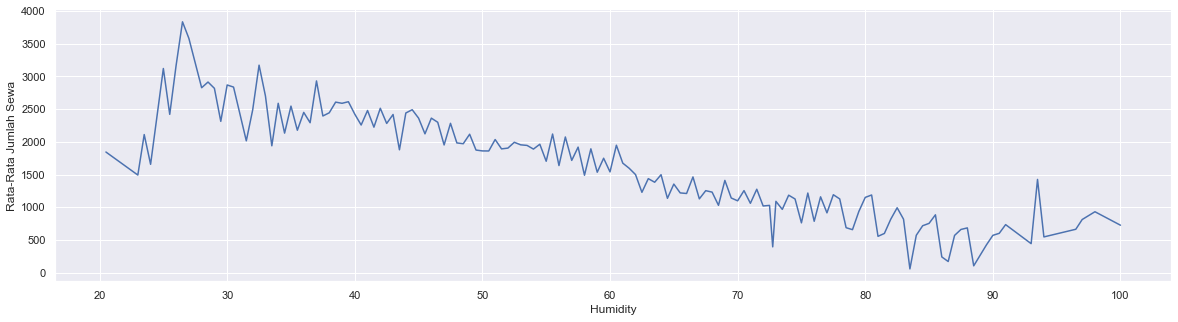

In [325]:
# Rata-rata jumlah sewa di group by 'hum'
mean_hum = df.groupby('hum').mean()['cnt'].round()
# Memvisualisasikan dengan line plot agar dapat dibandingkan seiiring meningkatnya humidity
plt.figure(figsize=(20,5))
sns.lineplot(mean_hum.index, mean_hum)
plt.xlabel('Humidity')
plt.ylabel('Rata-Rata Jumlah Sewa')

Insight:
- Sesuai dengan tabel korelasi sebelumnya, jumlah sewa cenderung lebih tinggi pada suhu yang lebih hangat
- Sedangkan humiditas menunjukkan korelasi negatif, dimana jumlah sewa cenderung menurun seiiring meningkatnya tingkat humiditas

### Perbandingan Rata-Rata Jumlah Sewa berdasarkan tiap Jam:

In [150]:
# Rata-rata jumlah sewa di group by 'time'
mean_time = df.groupby('time').mean()['cnt'].round()
mean_time

time
00:00     291.0
01:00     201.0
02:00     136.0
03:00      94.0
04:00      73.0
05:00     111.0
06:00     467.0
07:00    1469.0
08:00    2883.0
09:00    1653.0
10:00    1065.0
11:00    1151.0
12:00    1434.0
13:00    1506.0
14:00    1472.0
15:00    1565.0
16:00    1870.0
17:00    2830.0
18:00    2629.0
19:00    1652.0
20:00    1060.0
21:00     741.0
22:00     592.0
23:00     440.0
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Rata-Rata Jumlah Sewa berdasarkan Waktu')

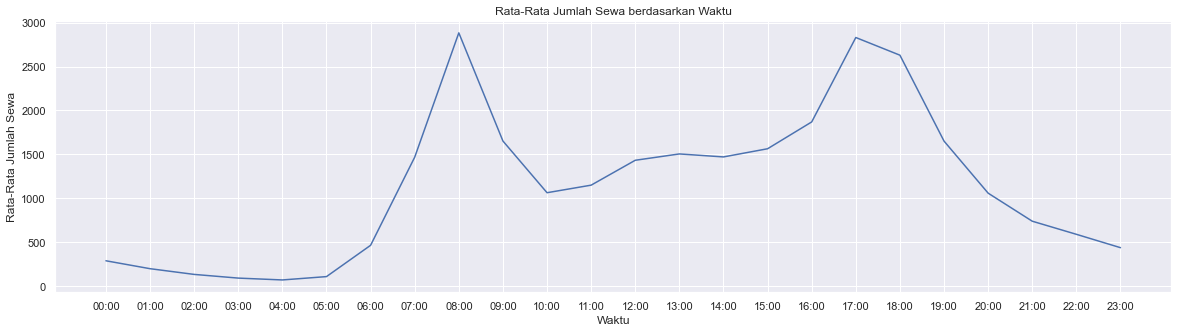

In [323]:
# Memvisualisasikan dengan line plot agar dapat dibandingkan tiap jamnya
plt.figure(figsize=(20,5))
sns.lineplot(mean_time.index, mean_time)
plt.xlabel('Waktu')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.title('Rata-Rata Jumlah Sewa berdasarkan Waktu')

Insight:
- Jumlah sewa terbanyak di jam 8 pagi dan jam 5-6 malam yang umumnya merupakan jam masuk dan pulang kantor di Inggris
- Hal ini menunjukkan banyak penyewa merupakan pekerja kantoran di London

Referensi: https://www.dailymail.co.uk/news/article-2082955/Forget-9-5-Brits-arrive-office-8-09am-leave-5-22pm.html

### Perbandingan Rata-Rata Jumlah Sewa di Akhir Pekan dan Hari Libur:

In [353]:
# Membandingkan jumlah hari Weekdays dan Weekend dalam dataset
pie_weekend = df.is_weekend.value_counts()
pie_weekend

Weekday    12444
Weekend     4970
Name: is_weekend, dtype: int64

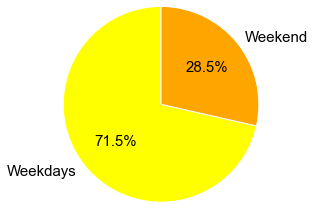

In [354]:
# Menggunakan pie chart untuk membandingkan persentase jumlah hari Weekdays dan Weekend
plt.figure(figsize=(3,3))
nama = ['Weekdays','Weekend']
plt.pie(pie_weekend, labels = nama,
        colors= ['yellow','orange'],
        startangle = 90,
        textprops = {
            'size' : 15,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1.5)
plt.show()

Perbandingan dalam dataset Weekdays (71.5%) dan Weekend (28.5%)

In [268]:
# Rata-rata jumlah sewa di group by 'is_weekend'
mean_weekend = df.groupby('is_weekend').mean()['cnt'].round()
mean_weekend

is_weekend
Weekday    1209.0
Weekend     977.0
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Rata-Rata Jumlah Sewa berdasarkan Akhir Pekan')

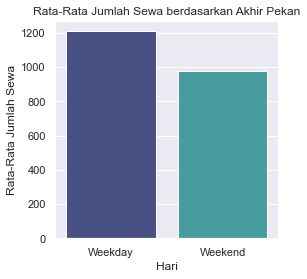

In [269]:
# Memvisualisasikan dengan bar plot agar dapat dibandingkan di akhir pekan
plt.figure(figsize=(4,4))
sns.barplot(mean_weekend.index, mean_weekend, palette = 'mako')
plt.xlabel('Hari')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.title('Rata-Rata Jumlah Sewa berdasarkan Akhir Pekan')

In [351]:
# Membandingkan jumlah hari libur dalam dataset
pie_holiday = df.is_holiday.value_counts()
pie_holiday

No         17030
Holiday      384
Name: is_holiday, dtype: int64

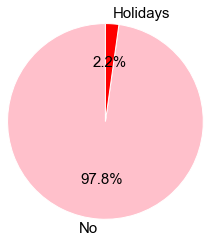

In [355]:
# Menggunakan pie chart untuk membandingkan persentase jumlah hari libur
plt.figure(figsize=(3,3))
nama = ['No','Holidays']
plt.pie(pie_holiday, labels = nama,
        colors= ['pink','red'],
        startangle = 90,
        textprops = {
            'size' : 15,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1.5)
plt.show()

Persentase hari libur dalam dataset hanya 2.2%

In [270]:
# Rata-rata jumlah sewa di group by 'is_holiday'
mean_holiday = df.groupby('is_holiday').mean()['cnt'].round()
mean_holiday

is_holiday
Holiday     770.0
No         1152.0
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Rata-Rata Jumlah Sewa berdasarkan Hari Libur')

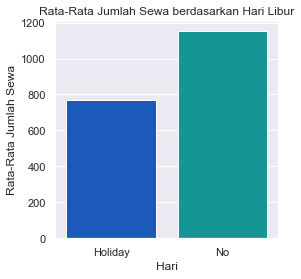

In [271]:
# Memvisualisasikan dengan bar plot agar dapat dibandingkan di hari libur
plt.figure(figsize=(4,4))
sns.barplot(mean_holiday.index, mean_holiday, palette = 'winter')
plt.xlabel('Hari')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.title('Rata-Rata Jumlah Sewa berdasarkan Hari Libur')

Insight:
- Di akhir pekan jumlah sewa sepeda lebih rendah daripada jumlah sewa di hari kerja
- Hal ini juga berlaku di hari libur dimana jumlah sewa sepeda lebih rendah

Text(0.5, 1.0, 'Komparasi di Akhir Pekan dan Hari Kerja')

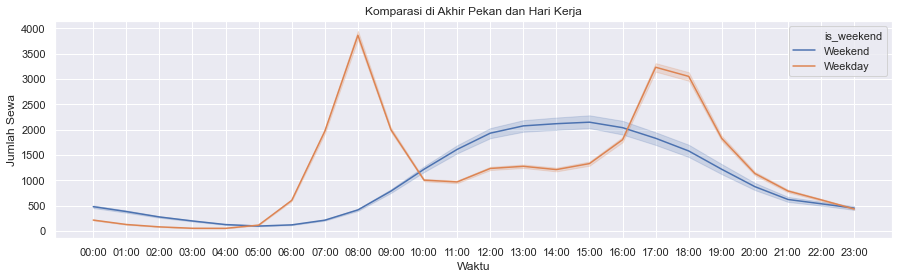

In [272]:
# Memvisualisasikan dengan line plot agar dapat dibandingkan di akhir pekan dalam pergerakkan waktu
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = 'time', y = 'cnt', hue = 'is_weekend')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Sewa')
plt.title('Komparasi di Akhir Pekan dan Hari Kerja')

Text(0.5, 1.0, 'Komparasi di Hari Libur dan Tidak Libur')

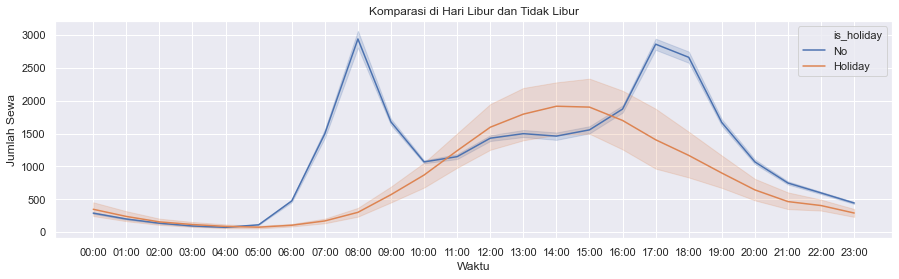

In [273]:
# Memvisualisasikan dengan line plot agar dapat dibandingkan di hari libur dalam pergerakkan waktu
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = 'time', y = 'cnt', hue = 'is_holiday')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Sewa')
plt.title('Komparasi di Hari Libur dan Tidak Libur')

Insight:
- Kedua lineplot diatas menunjukkan bentuk grafik yang hampir serupa untuk akhir pekan maupun hari libur
- Di hari kerja jumlah sewa tertinggi di jam 8 pagi dan jam 5-6 malam (jam masuk dan pulang kerja)
- Di hari weekend dan hari libur, jumlah sewa sepeda memuncak di jam 2-3 siang (sekitar jam makan siang)

### Perbandingan Rata-Rata Jumlah Sewa berdasarkan Hari:

In [274]:
# Rata-rata jumlah sewa di group by 'day'
mean_day = df.groupby('day').mean()['cnt'].round()
mean_day

day
1_Mon    1130.0
2_Tue    1230.0
3_Wed    1244.0
4_Thu    1259.0
5_Fri    1183.0
6_Sat     996.0
7_Sun     960.0
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Rata-Rata Jumlah Sewa berdasarkan Hari')

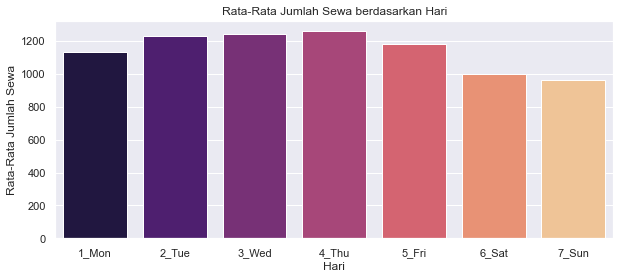

In [275]:
# Memvisualisasikan dengan bar plot agar dapat dibandingkan setiap harinya
plt.figure(figsize=(10,4))
sns.barplot(mean_day.index, mean_day, palette = "magma")
plt.xlabel('Hari')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.title('Rata-Rata Jumlah Sewa berdasarkan Hari')

Insight:
- Jumlah sewa di weekdays lebih tinggi daripada weekend
- Jumlah sewa tertinggi di hari Kamis (1259), hari kerja terendah di hari Senin (1130)
- Jumlah sewa di hari Sabtu (996) sedikit lebih banyak daripada hari Minggu (960)

### Perbandingan Rata-Rata Jumlah Sewa berdasarkan Cuaca:

In [361]:
# Membandingkan jumlah data antar kondisi cuaca dalam dataset
count_weather = df.weather_code.value_counts()
count_weather

A_Clear            6150
B_Few Clouds       4034
C_Broken Clouds    3551
E_Light Rain       2141
D_Cloudy           1464
G_Snowfall           60
F_Thunderstorm       14
Name: weather_code, dtype: int64

In [233]:
# Rata-rata jumlah sewa di group by 'weather_code'
mean_weather = df.groupby('weather_code').mean()['cnt'].round()
mean_weather

weather_code
A_Clear            1162.0
B_Few Clouds       1496.0
C_Broken Clouds    1195.0
D_Cloudy            635.0
E_Light Rain        713.0
F_Thunderstorm      583.0
G_Snowfall          251.0
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Rata-Rata Jumlah Sewa berdasarkan Cuaca')

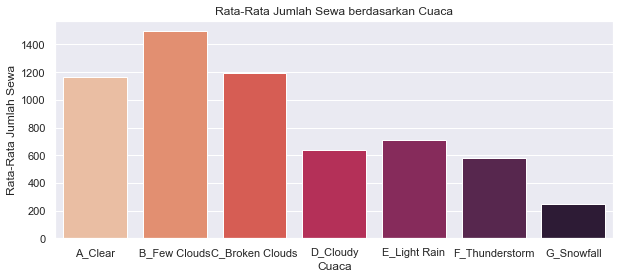

In [236]:
# Memvisualisasikan dengan bar plot agar dapat dibandingkan setiap cuaca
plt.figure(figsize=(10,4))
sns.barplot(mean_weather.index, mean_weather, palette = 'rocket_r')
plt.xlabel('Cuaca')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.title('Rata-Rata Jumlah Sewa berdasarkan Cuaca')

Insight:
- Jumlah sewa tertinggi di cuaca 'Few Clouds' (1496) yang merupakan cuaca terbaik (tidak terik, tidak hujan)
- Jumlah sewa terendah di cuaca 'Snowfall' (251) yang merupakan kondisi cuaca dingin dan bersalju

### Perbandingan Rata-Rata Jumlah Sewa berdasarkan Musim:

#### Perbandingan Cuaca tiap Musim

In [309]:
# Mengidentifikasi cuaca di tiap musim karena sebelumnya cuaca mempengaruhi jumlah sewa
pd.crosstab(df['season'], df['weather_code'])

weather_code,A_Clear,B_Few Clouds,C_Broken Clouds,D_Cloudy,E_Light Rain,F_Thunderstorm,G_Snowfall
season,,,,,,,
A_Spring,1752,955,804,326,544,7,6
B_Summer,1822,1119,775,216,450,5,0
C_Fall,1356,1034,1011,372,519,1,10
D_Winter,1220,926,961,550,628,1,44


Text(0.5, 1.0, 'Cuaca tiap Musim')

<Figure size 720x360 with 0 Axes>

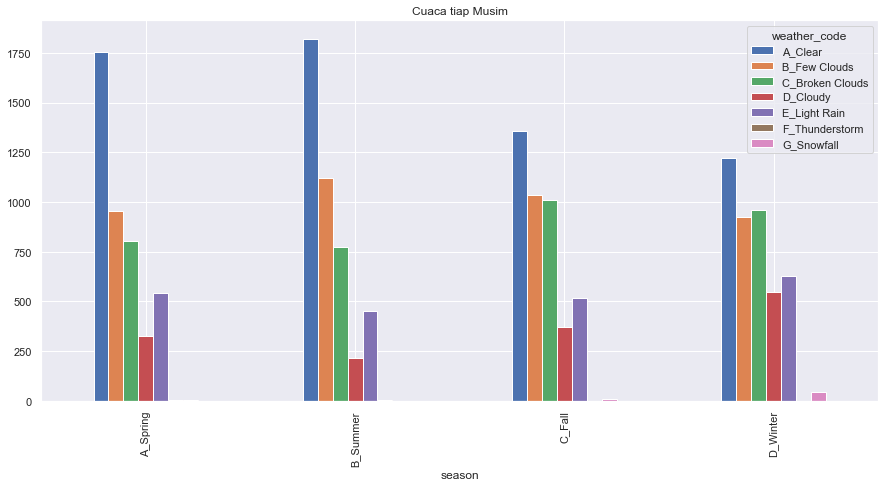

In [310]:
# Memvisualisasikan dengan bar plot agar dapat dibandingkan cuaca setiap musimnya
plt.figure(figsize=(10,5))
month_season = pd.crosstab(index = df['season'], columns = df['weather_code']).round()
month_season_bar = month_season.plot(kind = 'bar')
plt.title('Cuaca tiap Musim')

In [231]:
# Rata-rata jumlah sewa di group by 'season'
mean_season = df.groupby('season').mean()['cnt'].round()
mean_season

season
A_Spring    1104.0
B_Summer    1464.0
C_Fall      1179.0
D_Winter     822.0
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Rata-Rata Jumlah Sewa berdasarkan Musim')

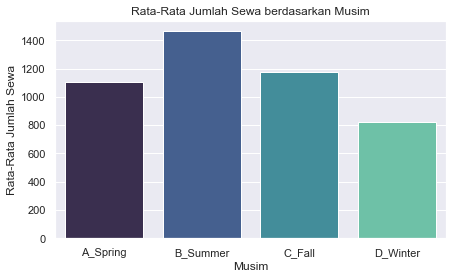

In [237]:
# Memvisualisasikan dengan bar plot agar dapat dibandingkan setiap musimnya
plt.figure(figsize=(7,4))
sns.barplot(mean_season.index, mean_season, palette = 'mako')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.title('Rata-Rata Jumlah Sewa berdasarkan Musim')

Text(0.5, 1.0, 'Komparasi di setiap Musim')

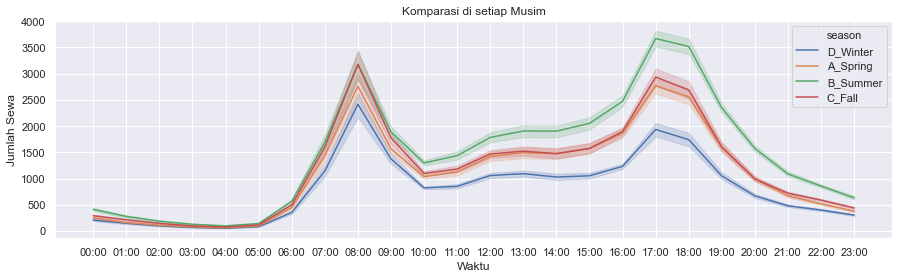

In [240]:
# Memvisualisasikan dengan line plot agar dapat dibandingkan setiap musim dalam pergerakkan waktu
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x = 'time', y = 'cnt', hue = 'season')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Sewa')
plt.title('Komparasi di setiap Musim')

Insight:
- Jumlah sewa tertinggi di musim Summer (1464), kondisi cuaca di musim Summer paling baik dari musim lain dengan jumlah hujan paling sedikit
- Jumlah sewa terendah di musim Winter (822), kondisi cuaca di musim Winter memiliki jumlah hujan dan salju terbanyak

### Perbandingan Rata-Rata Jumlah Sewa berdasarkan Bulan:

In [229]:
# Rata-rata jumlah sewa di group by 'month'
mean_month = df.groupby('month').mean()['cnt'].round()
mean_month

month
01_Jan      785.0
02_Feb      836.0
03_Mar      921.0
04_Apr     1113.0
05_May     1275.0
06_June    1383.0
07_July    1544.0
08_Aug     1463.0
09_Sep     1357.0
10_Oct     1218.0
11_Nov      966.0
12_Dec      846.0
Name: cnt, dtype: float64

In [290]:
# Mengidentifikasi musim di tiap bulan karena musim juga mempengaruhi jumlah sewa
pd.crosstab(df['season'], df['month'])

month,01_Jan,02_Feb,03_Mar,04_Apr,05_May,06_June,07_July,08_Aug,09_Sep,10_Oct,11_Nov,12_Dec
season,,,,,,,,,,,,
A_Spring,0,0,1468,1438,1488,0,0,0,0,0,0,0
B_Summer,0,0,0,0,0,1422,1481,1484,0,0,0,0
C_Fall,0,0,0,0,0,0,0,0,1394,1479,1430,0
D_Winter,1487,1359,0,0,0,0,0,0,0,0,0,1484


Text(0.5, 1.0, 'Rata-Rata Jumlah Sewa berdasarkan Bulan')

<Figure size 720x360 with 0 Axes>

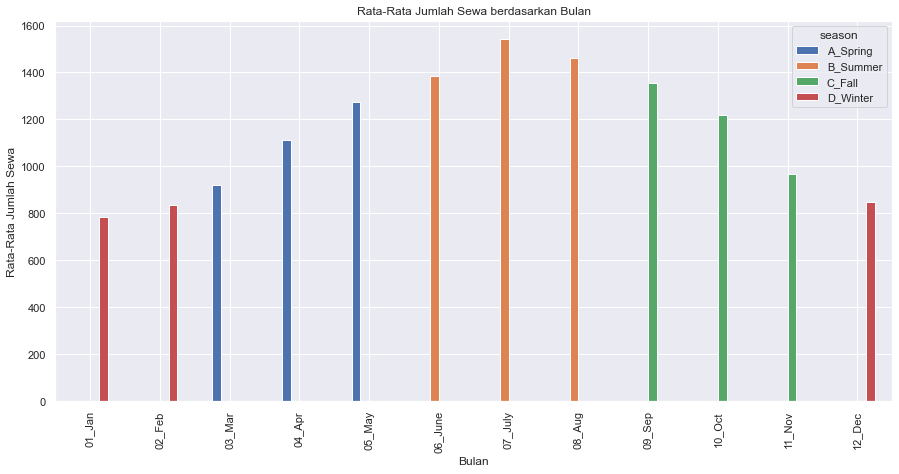

In [298]:
# Memvisualisasikan dengan bar plot agar dapat dibandingkan setiap bulannya
plt.figure(figsize=(10,5))
month_season = pd.crosstab(index = df['month'], columns = df['season'], values = df['cnt'], aggfunc = 'mean').round()
month_season_bar = month_season.plot(kind = 'bar')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.title('Rata-Rata Jumlah Sewa berdasarkan Bulan')

Insight:
- Jumlah sewa memuncak di bulan Juli (1544)
- Jumlah sewa tertinggi di bulan dengan musim Summer (Juni, Juli, Agustus)
- Jumlah sewa terendah di bulan Januari (785)
- Jumlah sewa terendah di bulan dengan musim Winter (Desember, Januari, Februari)

## Kesimpulan

Berdasarkan hasil analisis, dapat disimpulkan bahwa jumlah sewa sepeda sangat dipengaruhi oleh kondisi lingkungan seperti (cuaca, temperature, humidity) dan juga aktifitas sehari-hari warga London (dilihat dari hari dan jam), pengaruh faktor-faktor tersebut terhadap jumlah sewa sepeda antara lain:

Berdasarkan aktifitas:
- Jumlah sewa terbanyak pada jam berangkat-pulang kerja (jam 8 pagi dan jam 5-6 malam)
- Jumlah sewa lebih banyak di hari kerja dibandingkan pada weekend maupun hari libur
- Pada hari libur maupun weekend, jumlah sewa memuncak sekitar waktu makan siang (jam 2-3 siang)
- Dalam hari kerja, jumlah sewa terendah pada hari Senin, tertinggi pada hari Kamis

Berdasarkan kondisi lingkungan:
- Jumlah sewa terbanyak di musim Summer (Juni, Juli, Agustus), puncaknya di musim Juli
- Jumlah sewa terendah di musim Winter (Desember, Januari, Februari), terendah di bulan Januari
- Jumlah sewa terbanyak di kondisi cuaca tidak hujan, terendah pada cuaca bersalju
- Jumlah sewa meningkat pada suhu yang lebih hangat dan menurun seiiring meningkatnya tingkat humidity

## Saran

Meningkatkan jumlah sewa sepeda:
- Jumlah sewa sepeda yang cenderung rendah pada weekend dan hari libur menyebabkan banyak sepeda yang menganggur di dock station pada hari-hari tersebut
- Untuk meningkatkannya dapat dibuat program yang menarik khusus pada hari-hari tersebut (Cth. Harga sewa lebih rendah dengan paket sekian jam / paket 1 hari)
- Hal ini juga dapat diterapkan untuk waktu-waktu di hari kerja dengan jumlah sewa yang masih rendah dengan memasarkan kepada target pengguna selain pekerja kantoran

Persiapan armada sepeda:
- Pada kondisi kebutuhan sewa sepeda yang tinggi seperti pada musim panas, perlu dipersiapkan jumlah sepeda yang mencukupi kebutuhan warga London
- Persiapan ini juga termasuk dengan pemeliharaan sepeda karena akan sering digunakan pada saat tersebut